In [16]:
import datetime
import os.path
import sys

sys.path.append("/home/jack/work/quant/backtrader/")

In [17]:
import backtrader as bt

In [19]:
data = bt.feeds.YahooFinanceCSVData(
    dataname="/home/jack/work/quant/backtrader/datas/orcl-1995-2014.txt",
    fromdate=datetime.datetime(2000, 1, 1),
    todate=datetime.datetime(2000, 12, 31),
    reverse=False
)

In [20]:
class StartStrategy(bt.Strategy):
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print("%s, %s" % (dt.isoformat(), txt))

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log("BUY excuted, Price: %.2f, Cost: %.2f, Commission: %.2f" % 
                        (order.executed.price,
                         order.executed.value,
                         order.executed.comm))
            elif order.issell():
                self.log("SELL excuted, Price: %.2f, Cost: %.2f, Comm: %.2f" %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Canceled/Margin/Rejected")

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log("Operation Profit, Gross: %.2f, Net: %.2f" % (trade.pnl, trade.pnlcomm))

    def next(self):
        self.log("Close, %.2f" % self.dataclose[0])

        if self.order:
            return

        if not self.position:
            if self.dataclose[0] < self.dataclose[-1]:
    
                if self.dataclose[-1] < self.dataclose[-2]:
                    self.log("BUY created, %.2f" % self.dataclose[0])
                    self.buy(size=10)
        else:
            if len(self) >= (self.bar_executed + 5):
                self.log("SELL created, %.2f" % self.dataclose[0])
                self.order = self.sell(size=10)
                
     

In [27]:
cerebro = bt.Cerebro()
cerebro.addstrategy(StartStrategy)
cerebro.adddata(data)
cerebro.broker.setcash(10000)
cerebro.broker.setcommission(commission=0.001)
print("Start protfolio value: %.2f" % cerebro.broker.getvalue())
results = cerebro.run()
print("End protfolio value: %.2f" % cerebro.broker.getvalue())

Start protfolio value: 10000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-05, BUY created, 22.68
2000-01-06, BUY excuted, Price: 22.27, Cost: 222.70, Commission: 0.22
2000-01-06, Close, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-13, Close, 23.36
2000-01-13, SELL created, 23.36
2000-01-14, SELL excuted, Price: 24.24, Cost: 222.70, Comm: 0.24
2000-01-14, Operation Profit, Gross: 19.70, Net: 19.23
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, BUY created, 23.04
2000-01-28, BUY excuted, Price: 22.90, Cost: 229.00, Commission: 0.23
2000-01-28, Close, 21.07
2000-01-31, Close, 22.22
2000-02-01, Close, 24.02
2000-02-02, Close, 24.16
2000-02-03, Close, 25.21
2000-02-04, Close, 25.71
2000-02-04, SE

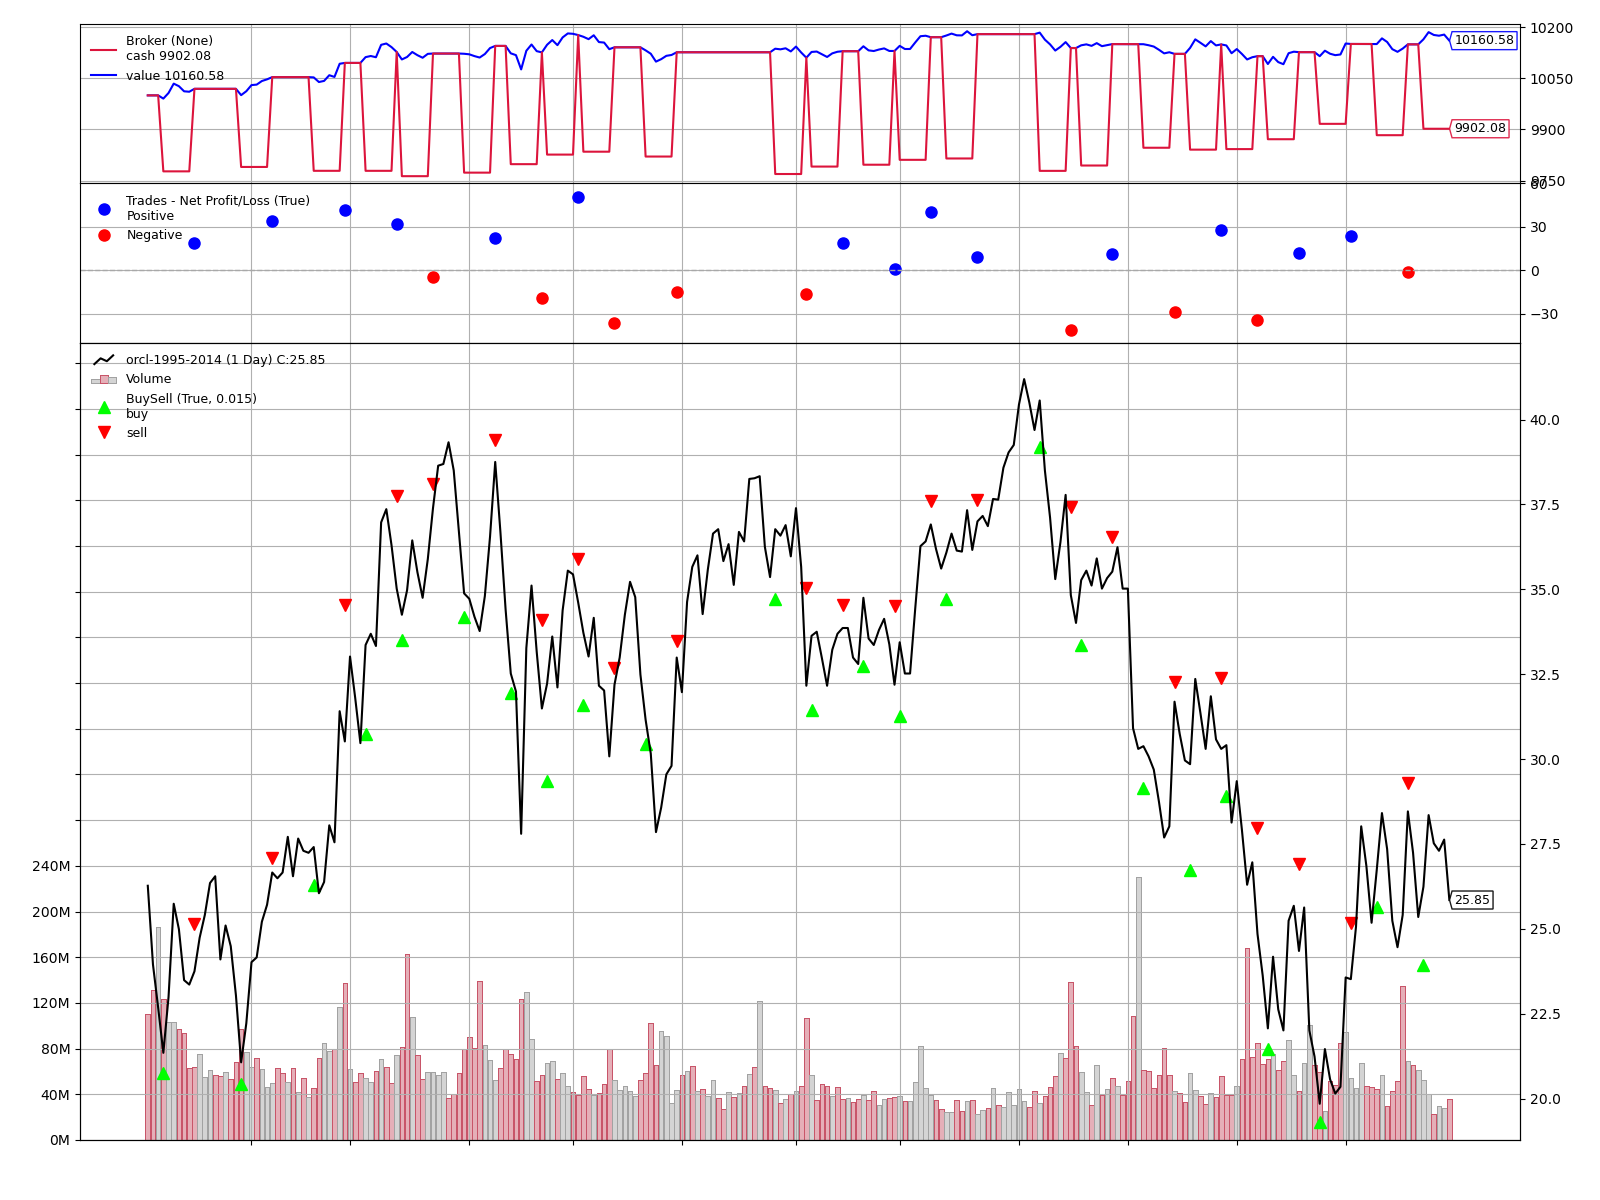

[[<Figure size 1600x1200 with 4 Axes>]]

In [42]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16, 12] 
cerebro.plot(iplot=False)